In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

In [2]:
targets = pd.read_csv('./datasets/targets.csv')
reg_weapons = pd.read_csv('./datasets/reg_weapons.csv')
population = pd.read_csv('./datasets/population.csv') 

In [3]:
reg_weapons.dtypes

year                       int64
state                     object
any_other_weapon          object
destructive_device        object
machinegun                object
silencer                  object
short_barreled_rifle      object
short_barreled_shotgun    object
total_weapons             object
dtype: object

In [4]:
reg_weapons.columns

Index(['year', 'state', 'any_other_weapon', 'destructive_device', 'machinegun',
       'silencer', 'short_barreled_rifle', 'short_barreled_shotgun',
       'total_weapons'],
      dtype='object')

In [5]:
reg_weapons_cols = ['any_other_weapon', 'destructive_device', 'machinegun',
       'silencer', 'short_barreled_rifle', 'short_barreled_shotgun',
       'total_weapons']

In [6]:
for column in reg_weapons_cols:
    reg_weapons[column] = [int(value.replace(",", "")) for value in reg_weapons[column]]

In [7]:
reg_weapons.dtypes

year                       int64
state                     object
any_other_weapon           int64
destructive_device         int64
machinegun                 int64
silencer                   int64
short_barreled_rifle       int64
short_barreled_shotgun     int64
total_weapons              int64
dtype: object

In [8]:
population.dtypes

year           int64
state         object
population    object
dtype: object

In [9]:
population['population'] = [int(value.replace(",", "")) for value in population['population']]

In [10]:
population.dtypes

year           int64
state         object
population     int64
dtype: object

In [11]:
population['state'] = [value.replace(".", "") for value in population['state']]

In [12]:
population

,year,state,population
0,2014,Alabama,4841799
1,2014,Alaska,736283
2,2014,Arizona,6730413
3,2014,Arkansas,2967392
4,2014,California,38596972
...,...,...,...
301,2019,Virginia,8535519
302,2019,Washington,7614893
303,2019,West Virginia,1792147
304,2019,Wisconsin,5822434


In [13]:
targets

,year,state,gun_death_rate,gun_deaths
0,2019,Alaska,24.4,179
1,2018,Alaska,21.0,155
2,2017,Alaska,24.5,180
3,2016,Alaska,23.3,177
4,2015,Alaska,23.4,177
...,...,...,...,...
295,2018,Wyoming,21.5,124
296,2017,Wyoming,18.8,113
297,2016,Wyoming,17.4,101
298,2015,Wyoming,19.6,113


In [14]:
reg_weapons

,year,state,any_other_weapon,destructive_device,machinegun,silencer,short_barreled_rifle,short_barreled_shotgun,total_weapons
0,2014,Alabama,1143,62117,17463,11967,1915,2139,96744
1,2014,Alaska,318,4164,1643,2919,919,1204,11167
2,2014,Arkansas,588,44522,5059,9609,1712,1037,62527
3,2014,Arizona,1128,75858,15649,21382,7162,1951,123130
4,2014,California,3806,230410,28822,8907,8069,12863,292877
...,...,...,...,...,...,...,...,...,...
301,2019,Vermont,232,3067,1421,2177,655,164,7716
302,2019,Washington,1965,52180,4525,48010,12109,1040,119829
303,2019,Wisconsin,797,33621,8138,29333,6400,1350,79639
304,2019,West Virginia,471,20948,7084,9627,2379,1142,41651


In [15]:
population

,year,state,population
0,2014,Alabama,4841799
1,2014,Alaska,736283
2,2014,Arizona,6730413
3,2014,Arkansas,2967392
4,2014,California,38596972
...,...,...,...
301,2019,Virginia,8535519
302,2019,Washington,7614893
303,2019,West Virginia,1792147
304,2019,Wisconsin,5822434


## Note: Not including District of Columbia

In [16]:
df = pd.merge(targets, reg_weapons, how= 'left', left_on=['year','state'], right_on=['year','state'])

In [17]:
df = pd.merge(df, population, how= 'left', left_on=['year','state'], right_on=['year','state'])

In [18]:
state_codes = {'Alabama': 1,
               'Alaska': 2,
               'Arkansas': 3,
               'Arizona': 4,
               'California': 5,
               'Colorado': 6,
               'Connecticut': 7,
               'Delaware': 8,
               'Florida': 9,
               'Georgia': 10,
               'Hawaii': 11,
               'Iowa': 12,
               'Idaho': 13,
               'Illinois': 14,
               'Indiana': 15,
               'Kansas': 16,
               'Kentucky': 17,
               'Louisiana': 18,
               'Massachusetts': 19,
               'Maryland': 20,
               'Maine': 21,
               'Michigan': 22,
               'Minnesota': 23,
               'Missouri': 24,
               'Mississippi': 25,
               'Montana': 26,
               'North Carolina': 27,
               'North Dakota': 28,
               'Nebraska': 29,
               'New Hampshire': 30,
               'New Jersey': 31,
               'New Mexico': 32,
               'Nevada': 33,
               'New York': 34,
               'Ohio': 35,
               'Oklahoma': 36,
               'Oregon': 37,
               'Pennsylvania': 38,
               'Rhode Island': 39,
               'South Carolina': 40,
               'South Dakota': 41,
               'Tennessee': 42,
               'Texas': 43,
               'Utah': 44,
               'Virginia': 45,
               'Vermont': 46,
               'Washington': 47,
               'Wisconsin': 48,
               'West Virginia': 49,
               'Wyoming': 50
              }

In [19]:
df['state_id'] = [state_codes[state] for state in df['state']]

In [20]:
region_dict = {'Alabama' : 'South',
               'Alaska' : 'West',
               'Arizona' : 'West',
               'Arkansas' : 'South',
               'California' : 'West',
               'Colorado' : 'West',
               'Connecticut' : 'Northeast',
               'Delaware' : 'South',
               'District of Columbia' : 'South',
               'Florida' : 'South',
               'Georgia' : 'South',
               'Hawaii' : 'West',
               'Idaho' : 'West',
               'Illinois' : 'Midwest',
               'Indiana' : 'Midwest',
               'Iowa' : 'Midwest',
               'Kansas' : 'Midwest',
               'Kentucky' : 'South',
               'Louisiana' : 'South',
               'Maine' : 'Northeast',
               'Maryland' : 'South',
               'Massachusetts' : 'Northeast',
               'Michigan' : 'Midwest',
               'Minnesota' : 'Midwest',
               'Mississippi' : 'South',
               'Missouri' : 'Midwest',
               'Montana' : 'West',
               'Nebraska' : 'Midwest',
               'Nevada' : 'West',
               'New Hampshire' : 'Northeast',
               'New Jersey' : 'Northeast',
               'New Mexico' : 'West',
               'New York' : 'Northeast',
               'North Carolina' : 'South',
               'North Dakota' : 'Midwest',
               'Ohio' : 'Midwest',
               'Oklahoma' : 'South',
               'Oregon' : 'West',
               'Pennsylvania' : 'Northeast',
               'Rhode Island' : 'Northeast',
               'South Carolina' : 'South',
               'South Dakota' : 'Midwest',
               'Tennessee' : 'South',
               'Texas' : 'South',
               'Utah' : 'West',
               'Vermont' : 'Northeast',
               'Virginia' : 'South',
               'Washington' : 'West',
               'West Virginia' : 'South',
               'Wisconsin' : 'Midwest',
               'Wyoming': 'West'}

In [21]:
df['region'] = [region_dict[state] for state in df['state']]

In [22]:
election_2020_dict = {'Alabama' : 'Red',
               'Alaska' : 'Red',
               'Arizona' : 'Blue',
               'Arkansas' : 'Red',
               'California' : 'Blue',
               'Colorado' : 'Blue',
               'Connecticut' : 'Blue',
               'Delaware' : 'Blue',
               'District of Columbia' : 'Blue',
               'Florida' : 'Red',
               'Georgia' : 'Blue',
               'Hawaii' : 'Blue',
               'Idaho' : 'Red',
               'Illinois' : 'Blue',
               'Indiana' : 'Red',
               'Iowa' : 'Red',
               'Kansas' : 'Red',
               'Kentucky' : 'Red',
               'Louisiana' : 'Red',
               'Maine' : 'Blue',
               'Maryland' : 'Blue',
               'Massachusetts' : 'Blue',
               'Michigan' : 'Blue',
               'Minnesota' : 'Blue',
               'Mississippi' : 'Red',
               'Missouri' : 'Red',
               'Montana' : 'Red',
               'Nebraska' : 'Red',
               'Nevada' : 'Blue',
               'New Hampshire' : 'Blue',
               'New Jersey' : 'Blue',
               'New Mexico' : 'Blue',
               'New York' : 'Blue',
               'North Carolina' : 'Red',
               'North Dakota' : 'Red',
               'Ohio' : 'Red',
               'Oklahoma' : 'Red',
               'Oregon' : 'Blue',
               'Pennsylvania' : 'Blue',
               'Rhode Island' : 'Blue',
               'South Carolina' : 'Red',
               'South Dakota' : 'Red',
               'Tennessee' : 'Red',
               'Texas' : 'Red',
               'Utah' : 'Red',
               'Vermont' : 'Blue',
               'Virginia' : 'Blue',
               'Washington' : 'Blue',
               'West Virginia' : 'Red',
               'Wisconsin' : 'Blue',
               'Wyoming': 'Red'}

In [23]:
df['elect_res_2020'] = [election_2020_dict[state] for state in df['state']]

In [24]:
df.columns

Index(['year', 'state', 'gun_death_rate', 'gun_deaths', 'any_other_weapon',
       'destructive_device', 'machinegun', 'silencer', 'short_barreled_rifle',
       'short_barreled_shotgun', 'total_weapons', 'population', 'state_id',
       'region', 'elect_res_2020'],
      dtype='object')

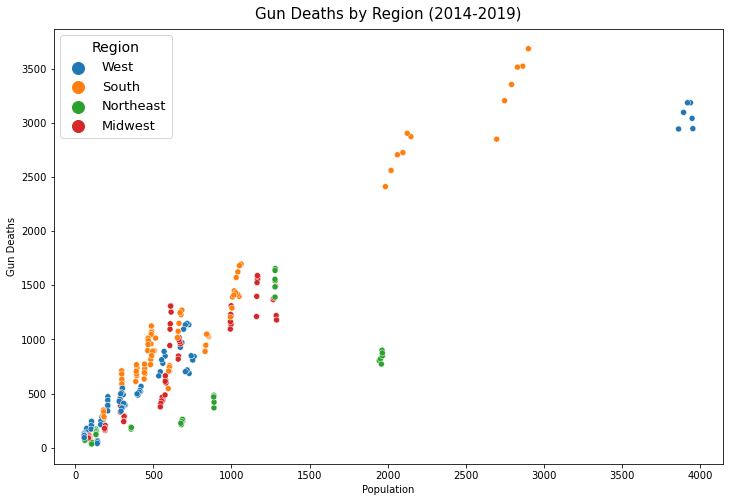

In [25]:
plt.figure(figsize=(12, 8))
plt.title("Gun Deaths by Region (2014-2019)", fontsize= 15, pad= 10)
plt.xlabel('Population')
plt.ylabel('Gun Deaths')
sns.scatterplot(data= df, x= (df['population']/10000), y= 'gun_deaths', hue= 'region')
plt.legend(fontsize=13, title= 'Region', title_fontsize = 14, markerscale= 2);

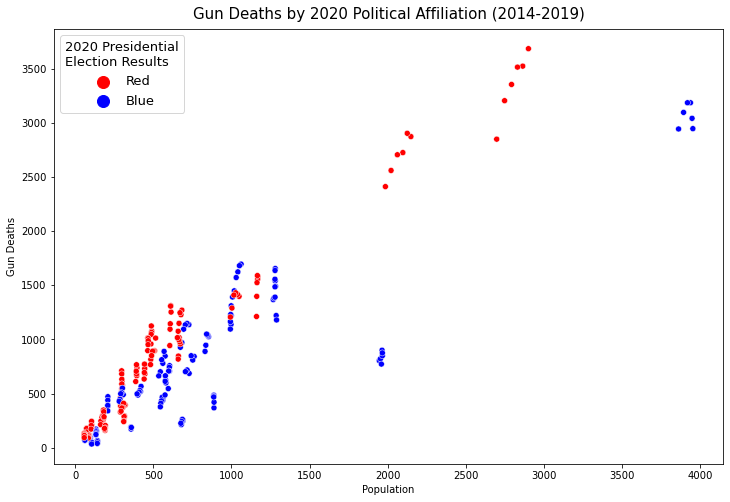

In [26]:
plt.figure(figsize=(12, 8))
plt.title("Gun Deaths by 2020 Political Affiliation (2014-2019)", fontsize= 15, pad= 10)
plt.xlabel('Population')
plt.ylabel('Gun Deaths')
sns.scatterplot(data= df, x= (df['population']/10000), y= 'gun_deaths', hue= 'elect_res_2020',
                palette= ['red','blue']) #make red appear red and blue appear blue
plt.legend(fontsize=13, title= '2020 Presidential\nElection Results', title_fontsize = 13, markerscale= 2);

In [27]:
df.dtypes

year                        int64
state                      object
gun_death_rate            float64
gun_deaths                  int64
any_other_weapon            int64
destructive_device          int64
machinegun                  int64
silencer                    int64
short_barreled_rifle        int64
short_barreled_shotgun      int64
total_weapons               int64
population                  int64
state_id                    int64
region                     object
elect_res_2020             object
dtype: object

In [28]:
df = pd.get_dummies(data= df, columns=['state'], drop_first= True)

In [29]:
df = pd.get_dummies(data= df, columns=['region'], drop_first= True)

In [30]:
df = pd.get_dummies(data= df, columns=['elect_res_2020'], drop_first= True)

In [31]:
df

,year,gun_death_rate,gun_deaths,any_other_weapon,destructive_device,machinegun,silencer,short_barreled_rifle,short_barreled_shotgun,total_weapons,...,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,region_Northeast,region_South,region_West,elect_res_2020_Red
0,2019,24.4,179,332,5346,1674,9250,2503,1415,20520,...,0,0,0,0,0,0,0,0,1,1
1,2018,21.0,155,328,5032,1650,7107,2131,1324,17572,...,0,0,0,0,0,0,0,0,1,1
2,2017,24.5,180,327,4722,1650,6040,1783,1302,15824,...,0,0,0,0,0,0,0,0,1,1
3,2016,23.3,177,322,4651,1652,4213,1333,1268,13439,...,0,0,0,0,0,0,0,0,1,1
4,2015,23.4,177,320,4499,1674,3527,1162,1242,12424,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2018,21.5,124,317,116571,1804,7769,1223,399,128083,...,0,0,0,0,0,1,0,0,1,1
296,2017,18.8,113,312,120927,1790,8294,1087,396,132806,...,0,0,0,0,0,1,0,0,1,1
297,2016,17.4,101,303,120899,1774,3744,675,392,127787,...,0,0,0,0,0,1,0,0,1,1
298,2015,19.6,113,302,118123,1748,3044,571,388,124176,...,0,0,0,0,0,1,0,0,1,1


In [32]:
df['log_gun_death'] = np.log(df['gun_deaths'])

In [33]:
df.columns

Index(['year', 'gun_death_rate', 'gun_deaths', 'any_other_weapon',
       'destructive_device', 'machinegun', 'silencer', 'short_barreled_rifle',
       'short_barreled_shotgun', 'total_weapons', 'population', 'state_id',
       'state_Alaska', 'state_Arizona', 'state_Arkansas', 'state_California',
       'state_Colorado', 'state_Connecticut', 'state_Delaware',
       'state_Florida', 'state_Georgia', 'state_Hawaii', 'state_Idaho',
       'state_Illinois', 'state_Indiana', 'state_Iowa', 'state_Kansas',
       'state_Kentucky', 'state_Louisiana', 'state_Maine', 'state_Maryland',
       'state_Massachusetts', 'state_Michigan', 'state_Minnesota',
       'state_Mississippi', 'state_Missouri', 'state_Montana',
       'state_Nebraska', 'state_Nevada', 'state_New Hampshire',
       'state_New Jersey', 'state_New Mexico', 'state_New York',
       'state_North Carolina', 'state_North Dakota', 'state_Ohio',
       'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania',
       'state_Rhode Island

In [34]:
features = ['year', 'any_other_weapon',
       'destructive_device', 'machinegun', 'silencer', 'short_barreled_rifle',
       'short_barreled_shotgun', 'total_weapons', 'population',
       'state_Alaska', 'state_Arizona', 'state_Arkansas', 'state_California',
       'state_Colorado', 'state_Connecticut', 'state_Delaware',
       'state_Florida', 'state_Georgia', 'state_Hawaii', 'state_Idaho',
       'state_Illinois', 'state_Indiana', 'state_Iowa', 'state_Kansas',
       'state_Kentucky', 'state_Louisiana', 'state_Maine', 'state_Maryland',
       'state_Massachusetts', 'state_Michigan', 'state_Minnesota',
       'state_Mississippi', 'state_Missouri', 'state_Montana',
       'state_Nebraska', 'state_Nevada', 'state_New Hampshire',
       'state_New Jersey', 'state_New Mexico', 'state_New York',
       'state_North Carolina', 'state_North Dakota', 'state_Ohio',
       'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania',
       'state_Rhode Island', 'state_South Carolina', 'state_South Dakota',
       'state_Tennessee', 'state_Texas', 'state_Utah', 'state_Vermont',
       'state_Virginia', 'state_Washington', 'state_West Virginia',
       'state_Wisconsin', 'state_Wyoming', 'region_Northeast', 'region_South',
       'region_West', 'elect_res_2020_Red']

In [35]:
train = df[df['year'] < 2019]

In [36]:
test = df[df['year'] == 2019]

In [37]:
X_train= train[features]
X_test= test[features]
y_train= train['log_gun_death']
y_test= test['log_gun_death']

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
lr.score(X_train, y_train)

0.9958998424774952

In [41]:
lr.score(X_test, y_test)

0.9901122426687815

In [42]:
pd.DataFrame({
    "column":X_train.columns,
    "coef": lr.coef_
})

,column,coef
0,year,0.036816
1,any_other_weapon,0.047315
2,destructive_device,0.047286
3,machinegun,0.047286
4,silencer,0.047288
...,...,...
57,state_Wyoming,-1.054076
58,region_Northeast,-0.722570
59,region_South,0.773235
60,region_West,-0.191721


In [43]:
lr.score(X_train, y_train)

0.9958998424774952

In [44]:
lr.score(X_test, y_test)

0.9901122426687815

In [45]:
train_baseline = [np.mean(y_train)] * len(y_train)
test_baseline = [np.mean(y_train)] * len(y_test)

In [46]:
mean_squared_error(np.exp(y_train), np.exp(lr.predict(X_train)), squared= False)

46.669117781424575

In [47]:
mean_squared_error(np.exp(y_train), np.exp(train_baseline), squared= False)

774.7537855815633

In [48]:
mean_squared_error(np.exp(y_test), np.exp(lr.predict(X_test)), squared= False)

108.509541110743

In [49]:
mean_squared_error(np.exp(y_test), np.exp(test_baseline), squared= False)

824.2095585781691

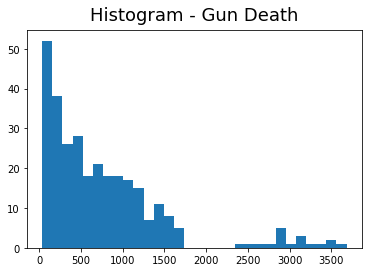

In [50]:
plt.title("Histogram - Gun Death", fontsize= 18, pad= 10)
plt.hist(df['gun_deaths'], bins= 30);

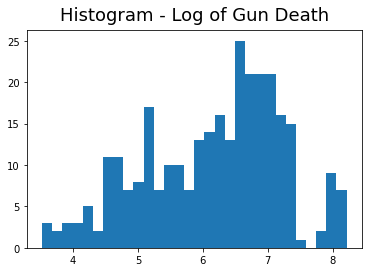

In [51]:
plt.title("Histogram - Log of Gun Death", fontsize= 18, pad= 10)
plt.hist(np.log(df['gun_deaths']), bins= 30);

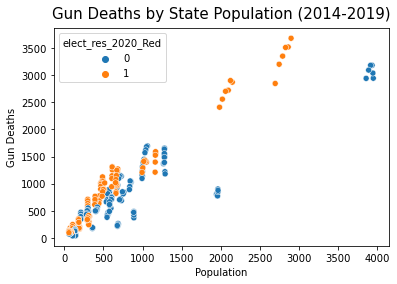

In [52]:
plt.title("Gun Deaths by State Population (2014-2019)", fontsize= 15, pad= 10)
plt.xlabel('Population')
plt.ylabel('Gun Deaths')
sns.scatterplot(data= df, x= (df['population']/10000), y= 'gun_deaths', hue= 'elect_res_2020_Red');

In [53]:
df.columns

Index(['year', 'gun_death_rate', 'gun_deaths', 'any_other_weapon',
       'destructive_device', 'machinegun', 'silencer', 'short_barreled_rifle',
       'short_barreled_shotgun', 'total_weapons', 'population', 'state_id',
       'state_Alaska', 'state_Arizona', 'state_Arkansas', 'state_California',
       'state_Colorado', 'state_Connecticut', 'state_Delaware',
       'state_Florida', 'state_Georgia', 'state_Hawaii', 'state_Idaho',
       'state_Illinois', 'state_Indiana', 'state_Iowa', 'state_Kansas',
       'state_Kentucky', 'state_Louisiana', 'state_Maine', 'state_Maryland',
       'state_Massachusetts', 'state_Michigan', 'state_Minnesota',
       'state_Mississippi', 'state_Missouri', 'state_Montana',
       'state_Nebraska', 'state_Nevada', 'state_New Hampshire',
       'state_New Jersey', 'state_New Mexico', 'state_New York',
       'state_North Carolina', 'state_North Dakota', 'state_Ohio',
       'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania',
       'state_Rhode Island

In [54]:
df['population']

0      731545
1      735139
2      739700
3      741456
4      737498
        ...  
295    577601
296    578931
297    584215
298    585613
299    582531
Name: population, Length: 300, dtype: int64

<AxesSubplot:>

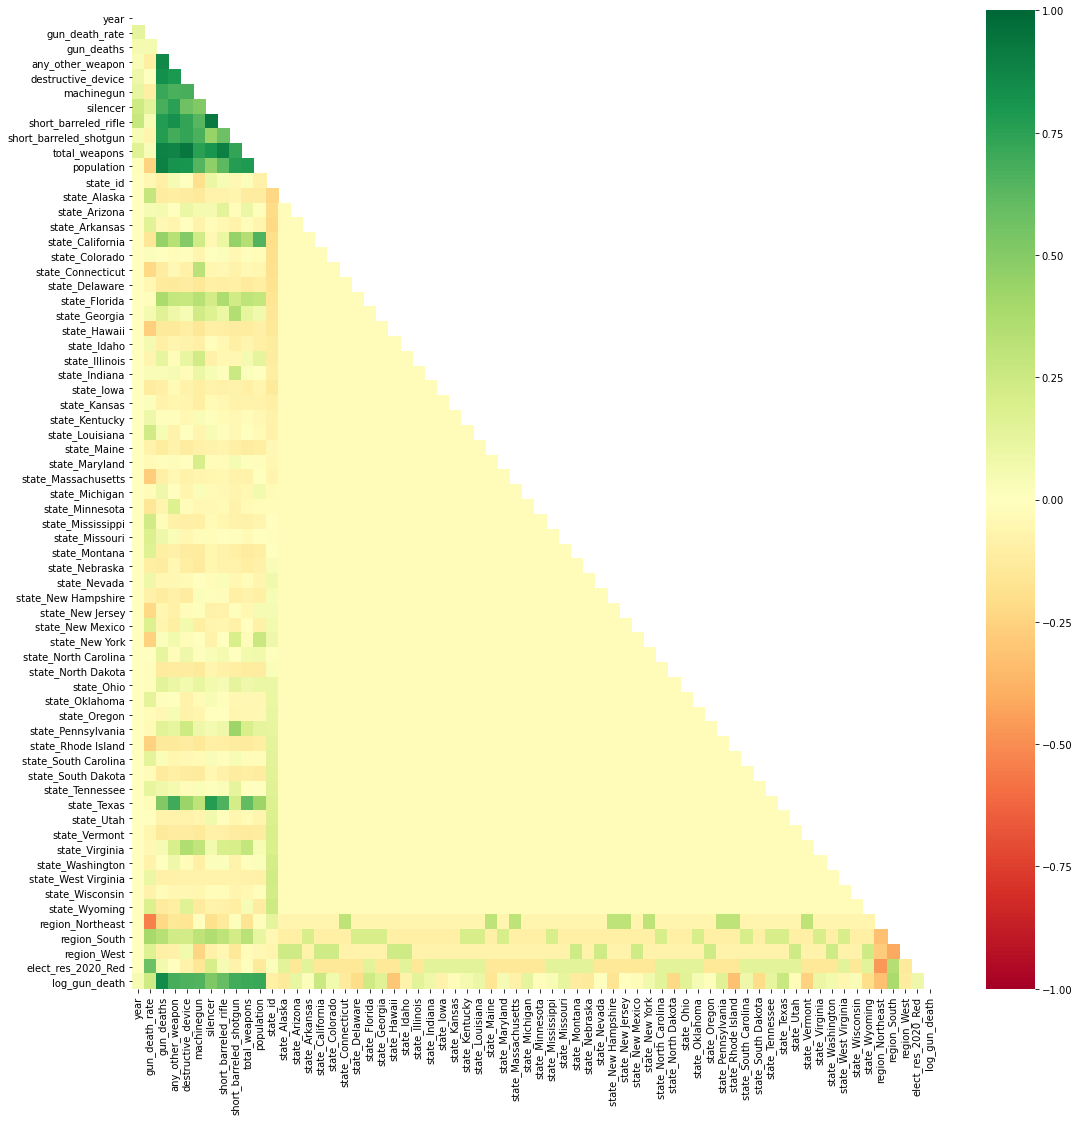

In [55]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,18))
sns.heatmap(data= corr, mask=mask, vmax=1, vmin=-1, cmap= 'RdYlGn')

In [56]:
## If you want to save the compiled data set, uncomment the line of code below and export the Dataframe as a CSV file.
## df.to_csv('./gun_data_2014-2019.csv')

In [57]:
df.head()

,year,gun_death_rate,gun_deaths,any_other_weapon,destructive_device,machinegun,silencer,short_barreled_rifle,short_barreled_shotgun,total_weapons,...,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,region_Northeast,region_South,region_West,elect_res_2020_Red,log_gun_death
0,2019,24.4,179,332,5346,1674,9250,2503,1415,20520,...,0,0,0,0,0,0,0,1,1,5.187386
1,2018,21.0,155,328,5032,1650,7107,2131,1324,17572,...,0,0,0,0,0,0,0,1,1,5.043425
2,2017,24.5,180,327,4722,1650,6040,1783,1302,15824,...,0,0,0,0,0,0,0,1,1,5.192957
3,2016,23.3,177,322,4651,1652,4213,1333,1268,13439,...,0,0,0,0,0,0,0,1,1,5.176150
4,2015,23.4,177,320,4499,1674,3527,1162,1242,12424,...,0,0,0,0,0,0,0,1,1,5.176150


In [58]:
#DecisionTree Scored 1.0 on training, .97 on testing

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

#mean_squared_error(np.exp(y_train), np.exp(dt.predict(X_train)), squared= False)

#mean_squared_error(np.exp(y_train), np.exp(train_baseline), squared= False)

mean_squared_error(np.exp(y_test), np.exp(dt.predict(X_test)), squared= False)

#mean_squared_error(np.exp(y_test), np.exp(test_baseline), squared= False)

1.0
0.9742149090249721


128.83470029460233

In [59]:
## Decision Tree GridSearch .99 training, .96 testing



params = {'max_depth' :[7,9,11,13],
         'min_samples_split': [2,4,6,8],
         'min_samples_leaf' : [1,2,3,4,5],
          'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10]
         }

grid = GridSearchCV(dt,
                    param_grid = params, cv= 2)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(cross_val_score(grid, X_test, y_test))
print(grid.score(X_train, y_train))

print(grid.score(X_test, y_test))

mean_squared_error(np.exp(y_test), np.exp(grid.predict(X_test)), squared= False)

{'ccp_alpha': 0, 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeRegressor(ccp_alpha=0, max_depth=13, min_samples_leaf=2)
[0.82551751 0.58094999 0.80336807 0.54270245 0.6493262 ]
0.9982954312949339
0.9659003791959166


160.39519384089363

In [60]:
# Random Forrest test:.99, train .98 MSE:107
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

rf.score(X_test, y_test)

params = {'n_estimators' : [70, 75, 80],
    'max_depth' :[9,10,11,],
         'min_samples_split': [7,8,9],
         'min_samples_leaf' : [3,4,5],
          'ccp_alpha' : [0, 0.01, 0.1, 1]
         }

grid_rf = GridSearchCV(rf,
                    param_grid = params)

grid_rf.fit(X_train, y_train)

print(grid_rf.best_params_)
print(grid_rf.score(X_train, y_train))
print(grid_rf.score(X_test, y_test))
print(cross_val_score(grid_rf, X_test, y_test))
print(grid_rf.best_score_)
#mean_squared_error(np.exp(y_train), np.exp(dt.predict(X_train)), squared= False)

#mean_squared_error(np.exp(y_train), np.exp(train_baseline), squared= False)

mean_squared_error(np.exp(y_test), np.exp(grid_rf.predict(X_test)), squared= False)

#mean_squared_error(np.exp(y_test), np.exp(test_baseline), squared= False)

{'ccp_alpha': 0, 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 80}
0.9907545017630544
0.9772255393480457
[0.86650417 0.83950987 0.75208672 0.80160868 0.81723302]
0.8445210480617658


122.52483955871334

In [61]:
grid_rf.best_score_

0.8445210480617658

In [62]:
#not sure I did this right, pretty much copied the lesson, we took the log of our data too so I dont know 
#if there is something we need to do about y

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test  = sc.transform(X_test)

pgrid = {
    'C' : np.linspace(0.00001, 5, 20),
    'loss' : ['epsilon_insensitive', 'squared_epsilon_insensitive']
}

In [63]:
svc = LinearSVR(max_iter = 5000)
gs = GridSearchCV(svc, pgrid)
gs.fit(Z_train, y_train)

/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_b

/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_b

/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/eduardoolmos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_b

GridSearchCV(estimator=LinearSVR(max_iter=5000),
             param_grid={'C': array([1.00000000e-05, 2.63167368e-01, 5.26324737e-01, 7.89482105e-01,
       1.05263947e+00, 1.31579684e+00, 1.57895421e+00, 1.84211158e+00,
       2.10526895e+00, 2.36842632e+00, 2.63158368e+00, 2.89474105e+00,
       3.15789842e+00, 3.42105579e+00, 3.68421316e+00, 3.94737053e+00,
       4.21052789e+00, 4.47368526e+00, 4.73684263e+00, 5.00000000e+00]),
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive']})

In [64]:
gs.best_score_

-33.908983746723464

In [65]:
gs.best_params_

{'C': 4.473685263157894, 'loss': 'epsilon_insensitive'}

In [66]:
gs.score(Z_test, y_test)

0.9872121022131103

In [67]:
#Cross Val score is also off, 
#cross_val_score(gs, X_test, y_test)

In [68]:
mean_squared_error(np.exp(y_test), np.exp(gs.predict(Z_test)), squared= False)

103.3047266346868

In [69]:
vote = VotingRegressor([
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor()),
    ('rf', RandomForestRegressor())
])

params = {
    "dt__ccp_alpha": [.001],
    "dt__max_depth": [9],
    "dt__min_samples_leaf": [4],
    "dt__min_samples_split": [4],
    "rf__ccp_alpha" : [0],
    "rf__max_depth" : [11],
    "rf__min_samples_leaf" : [4],
    "rf__min_samples_split" : [7],
    "rf__n_estimators" :[80] 
}

gs_vote = GridSearchCV(vote, param_grid=params, cv = 3, n_jobs = 4)
gs_vote.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=VotingRegressor(estimators=[('lr', LinearRegression()),
                                                   ('dt',
                                                    DecisionTreeRegressor()),
                                                   ('rf',
                                                    RandomForestRegressor())]),
             n_jobs=4,
             param_grid={'dt__ccp_alpha': [0.001], 'dt__max_depth': [9],
                         'dt__min_samples_leaf': [4],
                         'dt__min_samples_split': [4], 'rf__ccp_alpha': [0],
                         'rf__max_depth': [11], 'rf__min_samples_leaf': [4],
                         'rf__min_samples_split': [7],
                         'rf__n_estimators': [80]})

In [70]:
gs_vote.score(X_train, y_train)

0.9943831020324573

In [71]:
gs_vote.score(X_test, y_test)

0.9852093439944183

In [72]:
print(cross_val_score(gs_vote, X_test, y_test))
print(gs_vote.best_score_)
#mean_squared_error(np.exp(y_train), np.exp(dt.predict(X_train)), squared= False)

#mean_squared_error(np.exp(y_train), np.exp(train_baseline), squared= False)

mean_squared_error(np.exp(y_test), np.exp(gs_vote.predict(X_test)), squared= False)

#mean_squared_error(np.exp(y_test), np.exp(test_baseline), squared= False)

[0.88916685 0.82423172 0.7512277  0.82718757 0.54619128]
0.7336303950399451


94.21516895288323

In [73]:
np.exp(gs_vote.predict(X_test))

array([ 178.11589367, 1057.78335115,  753.59720833, 1081.41982794,
       3218.91615477,  917.85521319,  223.23566865,  113.58500449,
       2971.43490169, 1594.64285198,   50.84315126,  343.121781  ,
        283.75980651, 1453.63591303, 1033.00535822,  476.17527956,
        779.92316475, 1022.80904382,  242.87858558,  900.71788909,
        151.26679751, 1205.97986354,  515.18994217, 1199.39745054,
        653.01503578,  194.88159126, 1488.12947279,  105.01753009,
        187.21267396,  147.68254641,  526.05186185,  613.41626722,
        650.67752558,  882.67095907, 1542.86013261,  754.46663656,
        570.05404075, 1602.9573993 ,   47.13461385,  847.01353486,
        110.62880794, 1129.71419363, 3365.4541529 ,  427.95314488,
       1063.5387303 ,   85.66733629,  908.36923815,  623.23580435,
        313.11500427,  148.73597395])

In [74]:
np.exp(y_test)

0       179.0
6      1076.0
12      580.0
18     1136.0
24     2945.0
30      846.0
36      190.0
42       93.0
48     2872.0
54     1695.0
60       62.0
66      294.0
72      255.0
78     1367.0
84      958.0
90      403.0
96      682.0
102    1013.0
108     247.0
114     757.0
120     163.0
126    1220.0
132     465.0
138    1252.0
144     710.0
150     209.0
156    1397.0
162      93.0
168     205.0
174     156.0
180     368.0
186     471.0
192     490.0
198     804.0
204    1578.0
210     737.0
216     566.0
222    1541.0
228      48.0
234    1012.0
240     113.0
246    1270.0
252    3683.0
258     394.0
264    1025.0
270      67.0
276     842.0
282     604.0
288     300.0
294     133.0
Name: log_gun_death, dtype: float64